# Load Models

In [4]:
import tensorflow as tf
import os

# Directory where models are saved
models_directory = 'trained_models'

# Get list of model directories or files in the 'trained_models' folder
model_paths = [os.path.join(models_directory, model_name) for model_name in os.listdir(models_directory)]

# Initialize an empty list to store the loaded models
loaded_models = []

# Load each model
for model_path in model_paths:
    # Check if the model is in SavedModel format by looking for the 'saved_model.pb' file
    if os.path.isdir(model_path) and 'saved_model.pb' in os.listdir(model_path):
        model = tf.keras.models.load_model(model_path)
        loaded_models.append(model)
    # Check if the model is in HDF5 format by looking for the '.h5' extension
    elif model_path.endswith('.h5'):
        model = tf.keras.models.load_model(model_path)
        loaded_models.append(model)

print(f"Loaded {len(loaded_models)} models from '{models_directory}' directory.")

Loaded 5 models from 'trained_models' directory.


# Load Images

In [5]:
import os
import random
import numpy as np
import tensorflow as tf

def load_random_images_from_each_class(base_dir, image_size=(128, 128), num_samples=300):
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    
    # Initialize the minimum number of images to a large number before checking
    min_images = float('inf')
    
    # Find the minimum number of images across all classes
    for label in class_folders:
        image_files = [f for f in os.listdir(os.path.join(base_dir, label)) if f.endswith(('.png', '.jpg', '.jpeg'))]
        if len(image_files) < min_images:
            min_images = len(image_files)
    
    # If num_samples is not specified or if it's larger than the smallest class, set it to min_images
    if num_samples is None or num_samples > min_images:
        num_samples = min_images

    selected_images = []
    selected_labels = []
    label_to_idx = {label: idx for idx, label in enumerate(class_folders)}
    
    for label in class_folders:
        image_files = [f for f in os.listdir(os.path.join(base_dir, label)) if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        if len(image_files) >= num_samples:
            sampled_image_files = random.sample(image_files, num_samples)
        else:
            # Just a safety check; this condition should not occur due to earlier min_images check
            print(f"Class {label} does not have enough images for sampling.")
            continue
        
        for image_file in sampled_image_files:
            image_path = os.path.join(base_dir, label, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image_array = tf.keras.preprocessing.image.img_to_array(image)
            selected_images.append(image_array)
            selected_labels.append(label_to_idx[label])
    
    return np.array(selected_images), np.array(selected_labels)

# Usage
test_images, test_labels = load_random_images_from_each_class('./data_sorted/testing')


In [12]:
test_labels

array([0, 0, 0, ..., 4, 4, 4])

# Make Predictions

In [6]:
# List to store arrays of predictions (the softmax output) for each model
all_predictions = []

for model in loaded_models:
    # Predict to get raw scores
    predictions = model.predict(test_images)
    
    # Append the array of softmax scores to all_predictions
    all_predictions.append(predictions)


47/47 [==============================] - 6s 118ms/step


# Model Analysis

47/47 [==============================] - 6s 128ms/step


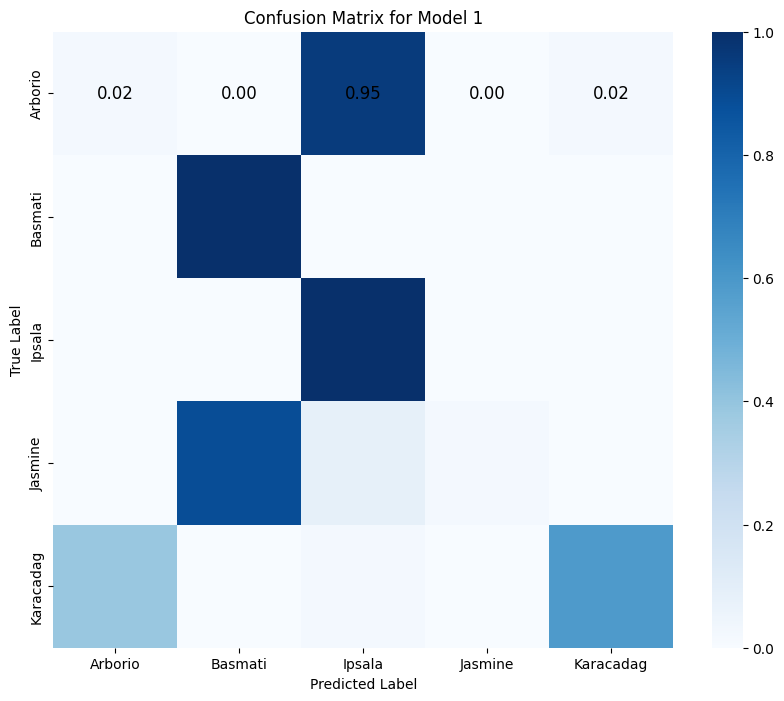

Classification report for Model 1
              precision    recall  f1-score   support

     Arborio       0.05      0.02      0.03       300
     Basmati       0.53      1.00      0.69       300
      Ipsala       0.48      1.00      0.65       300
     Jasmine       0.88      0.02      0.05       300
   Karacadag       0.97      0.59      0.73       300

    accuracy                           0.53      1500
   macro avg       0.58      0.53      0.43      1500
weighted avg       0.58      0.53      0.43      1500

47/47 [==============================] - 6s 123ms/step


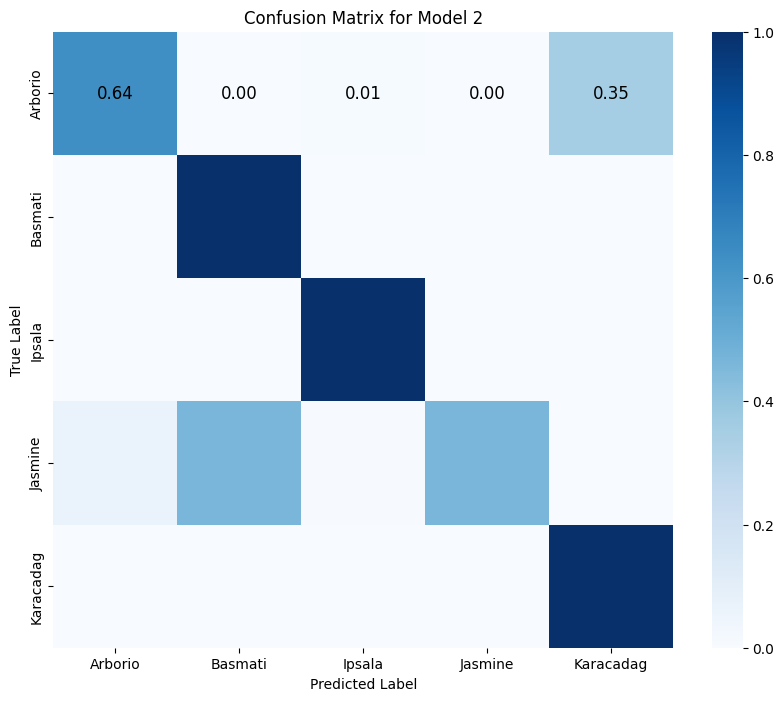

Classification report for Model 2
              precision    recall  f1-score   support

     Arborio       0.91      0.64      0.75       300
     Basmati       0.68      1.00      0.81       300
      Ipsala       0.98      1.00      0.99       300
     Jasmine       1.00      0.46      0.63       300
   Karacadag       0.74      1.00      0.85       300

    accuracy                           0.82      1500
   macro avg       0.86      0.82      0.81      1500
weighted avg       0.86      0.82      0.81      1500

47/47 [==============================] - 6s 127ms/step


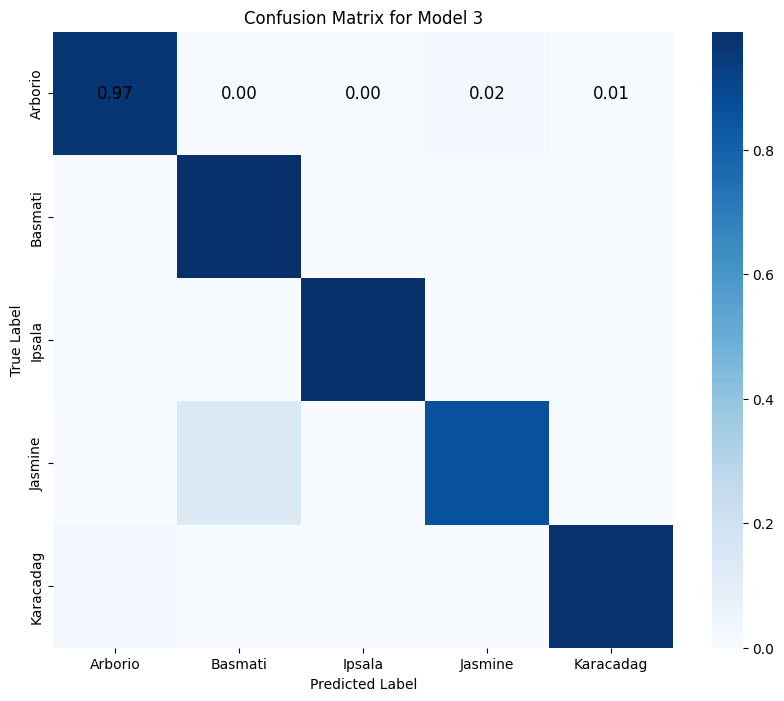

Classification report for Model 3
              precision    recall  f1-score   support

     Arborio       0.97      0.97      0.97       300
     Basmati       0.88      0.99      0.93       300
      Ipsala       1.00      0.99      0.99       300
     Jasmine       0.96      0.86      0.91       300
   Karacadag       0.99      0.98      0.99       300

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

47/47 [==============================] - 6s 119ms/step


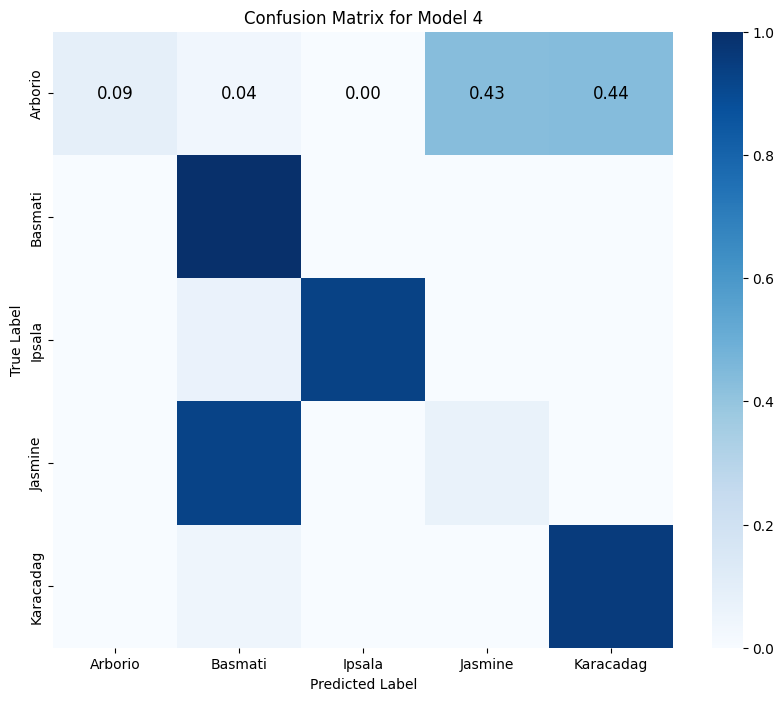

Classification report for Model 4
              precision    recall  f1-score   support

     Arborio       1.00      0.09      0.17       300
     Basmati       0.48      1.00      0.65       300
      Ipsala       1.00      0.93      0.96       300
     Jasmine       0.14      0.07      0.10       300
   Karacadag       0.69      0.96      0.80       300

    accuracy                           0.61      1500
   macro avg       0.66      0.61      0.54      1500
weighted avg       0.66      0.61      0.54      1500

47/47 [==============================] - 6s 127ms/step


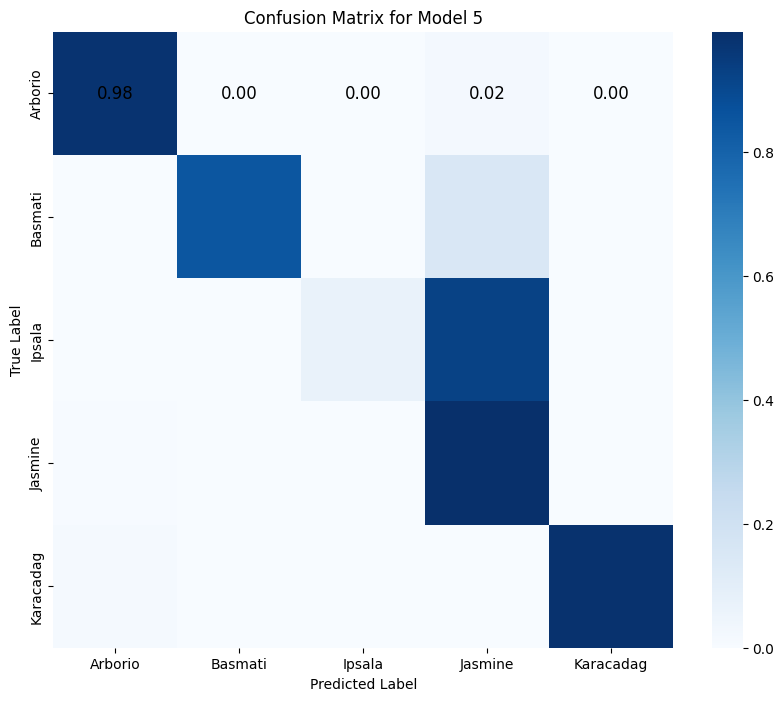

Classification report for Model 5
              precision    recall  f1-score   support

     Arborio       0.98      0.98      0.98       300
     Basmati       1.00      0.85      0.92       300
      Ipsala       1.00      0.07      0.14       300
     Jasmine       0.47      0.99      0.64       300
   Karacadag       1.00      0.98      0.99       300

    accuracy                           0.78      1500
   macro avg       0.89      0.78      0.73      1500
weighted avg       0.89      0.78      0.73      1500



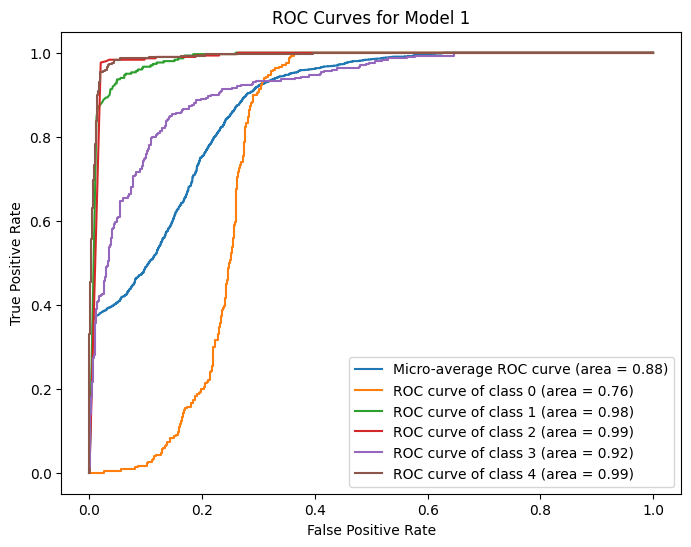

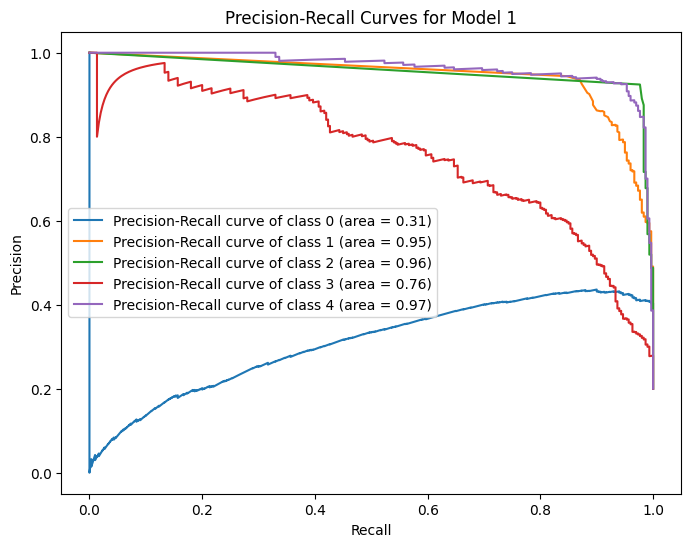

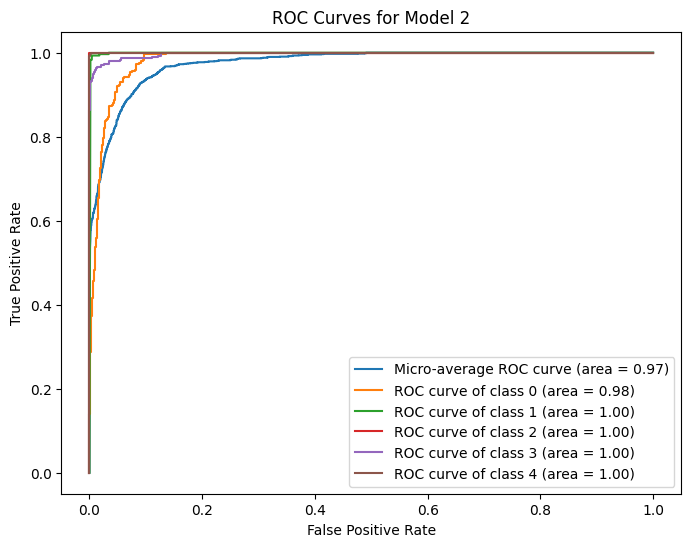

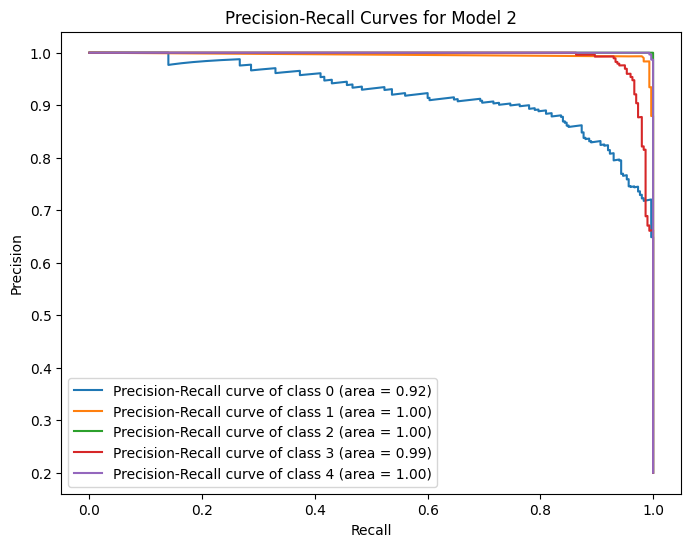

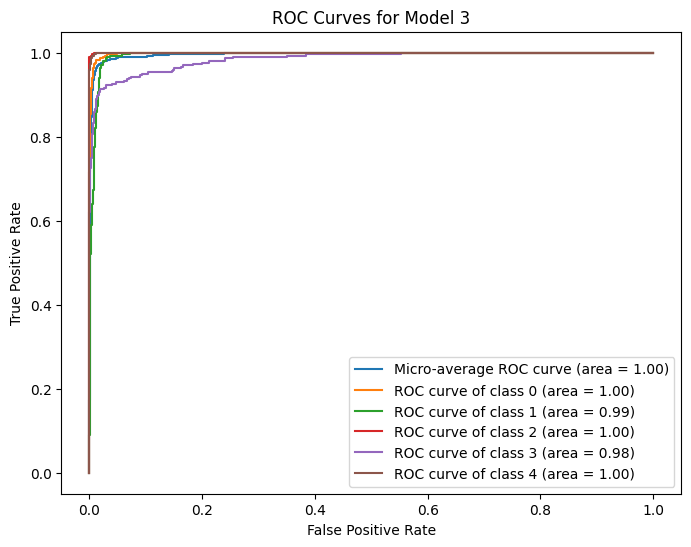

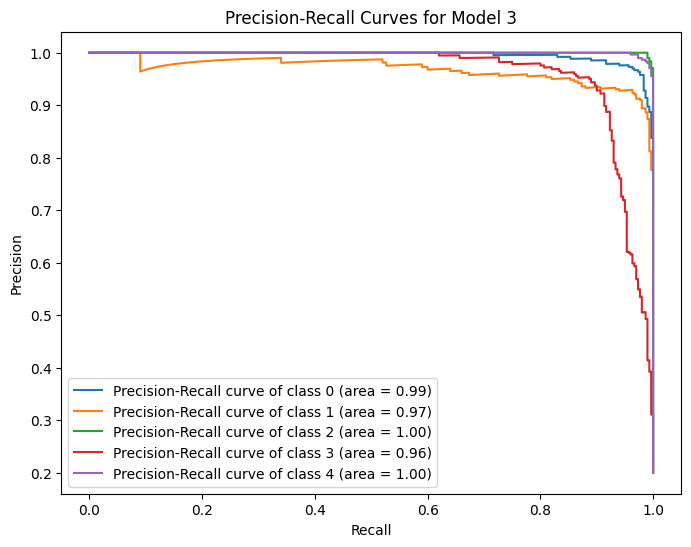

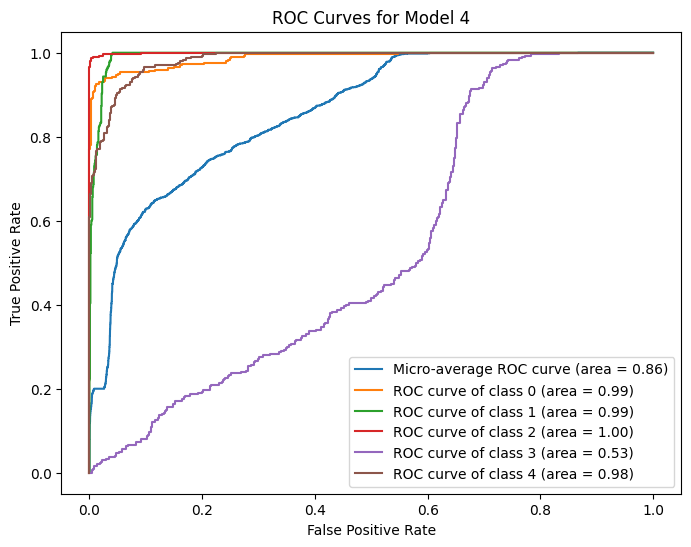

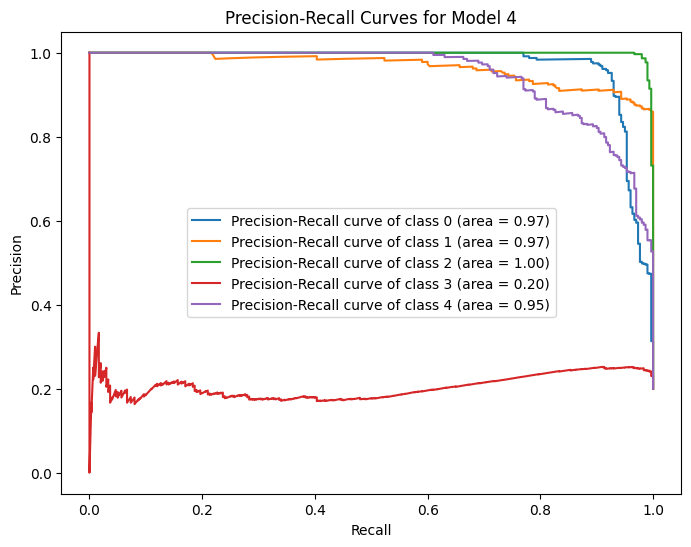

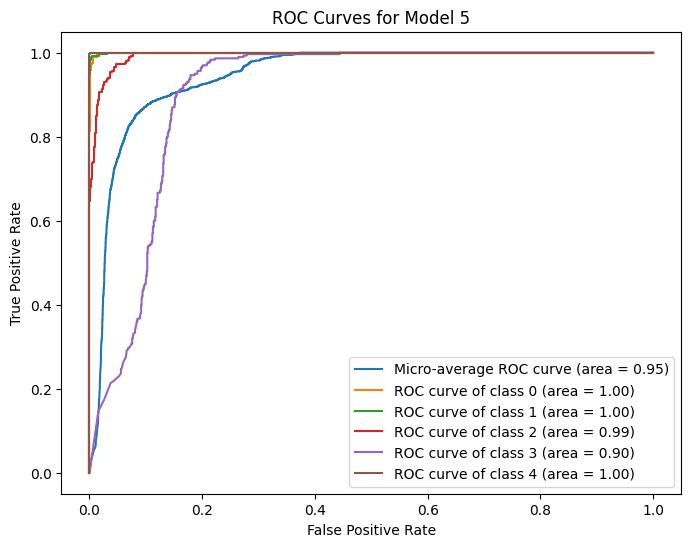

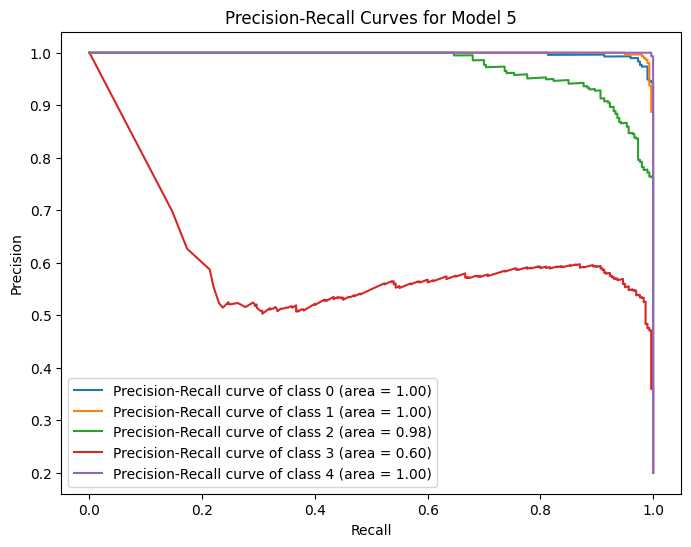

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

def plot_confusion_matrix(cm, labels, title='Confusion Matrix', normalize=True):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 12, "color": "black"})  # Ensure annotations are visible
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    plt.show()

def plot_roc_curves(y_true, y_score, n_classes, title='ROC Curves'):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curves(y_true, y_score, n_classes, title='Precision-Recall Curves'):
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_score[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

def evaluate_models(models, images, true_labels, class_names):
    y_true = label_binarize(true_labels, classes=range(len(class_names)))
    all_predictions = []

    for model_index, model in enumerate(models):
        # Predict the probabilities for each class
        predictions = model.predict(images)
        all_predictions.append(predictions)

        # Convert probabilities to predicted classes
        predicted_classes = np.argmax(predictions, axis=1)
        cm = confusion_matrix(true_labels, predicted_classes)

        # Plot confusion matrix
        plot_confusion_matrix(cm, class_names, title=f'Confusion Matrix for Model {model_index + 1}')

        # Print classification report
        print(f"Classification report for Model {model_index + 1}")
        print(classification_report(true_labels, predicted_classes, target_names=class_names))

    # Plot ROC and Precision-Recall curves for all models
    for model_index, predictions in enumerate(all_predictions):
        plot_roc_curves(y_true, predictions, len(class_names), title=f'ROC Curves for Model {model_index + 1}')
        plot_precision_recall_curves(y_true, predictions, len(class_names), title=f'Precision-Recall Curves for Model {model_index + 1}')

# Assuming loaded_models is a list of trained models and test_images, test_labels are loaded
evaluate_models(loaded_models, test_images, test_labels, class_names)


47/47 [==============================] - 6s 121ms/step


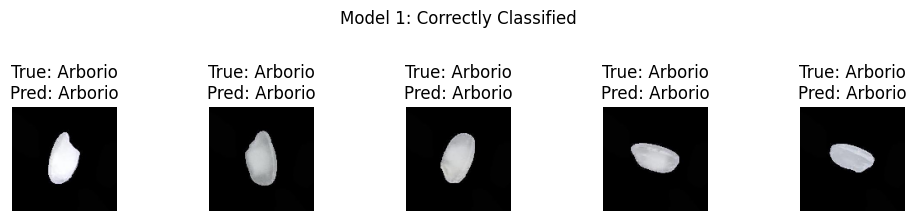

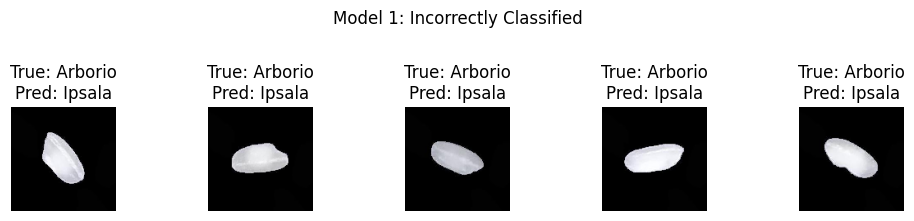

47/47 [==============================] - 6s 123ms/step


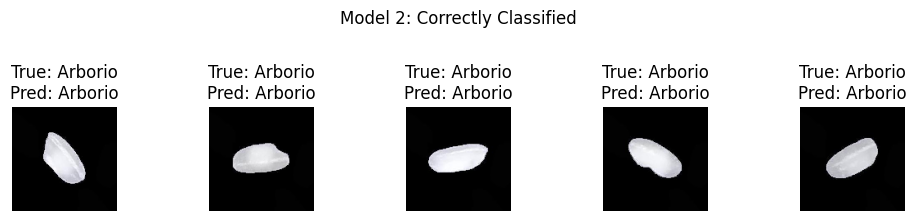

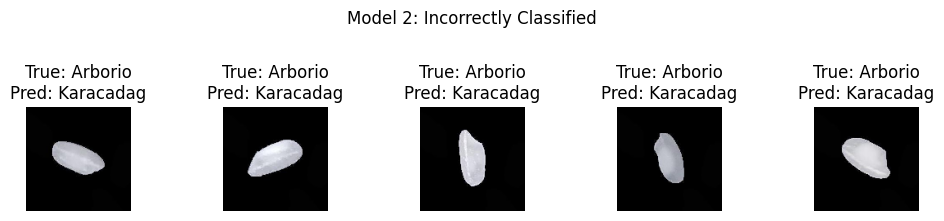

47/47 [==============================] - 6s 117ms/step


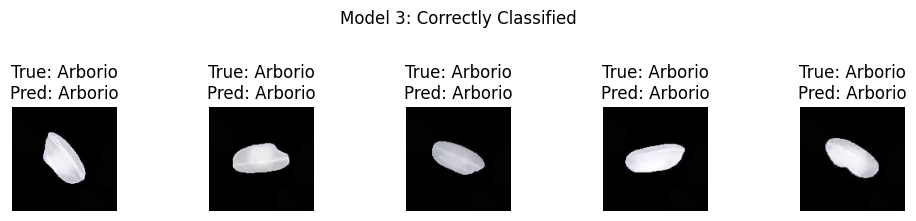

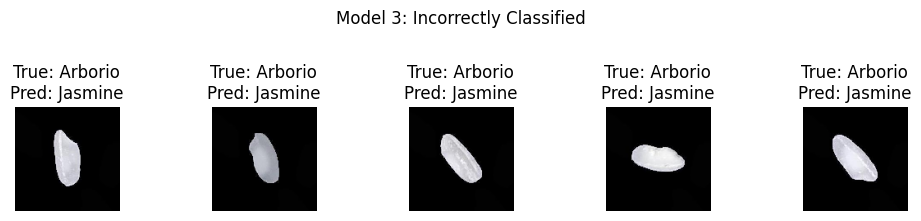

47/47 [==============================] - 6s 120ms/step


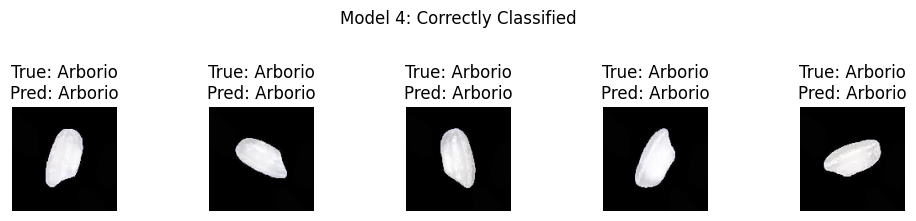

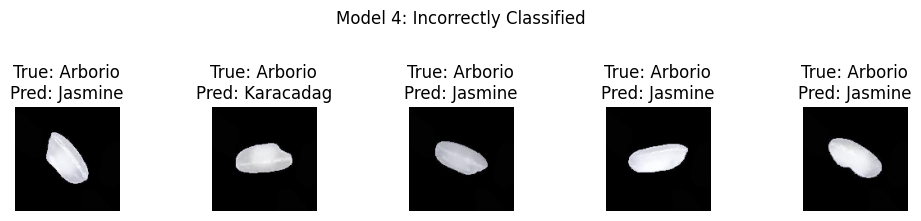

47/47 [==============================] - 6s 119ms/step


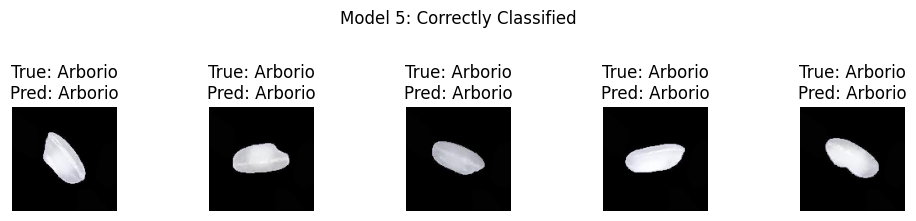

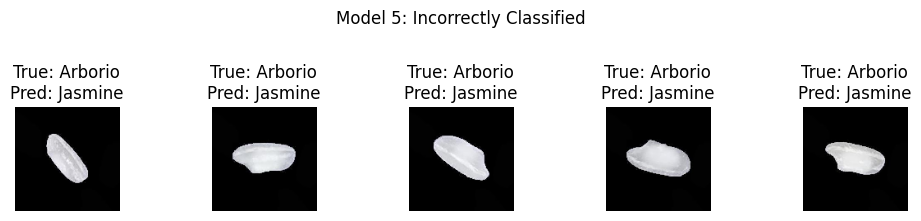

In [8]:
import matplotlib.pyplot as plt

# Function to display correctly and incorrectly classified images for each model
def display_classification_examples(models, test_images, test_labels, class_names):
    for model_index, model in enumerate(models):
        # Predict the classes for the test set
        predicted_classes = np.argmax(model.predict(test_images), axis=1)
        
        # Find the indices of the correct and incorrect predictions
        correct_indices = np.where(predicted_classes == test_labels)[0]
        incorrect_indices = np.where(predicted_classes != test_labels)[0]
        
        # Select 5 correctly classified images and 5 incorrectly classified images
        correct_sample_indices = correct_indices[:5]
        incorrect_sample_indices = incorrect_indices[:5]
        
        # Display correctly classified images
        plt.figure(figsize=(10, 2))
        for i, index in enumerate(correct_sample_indices, 1):
            plt.subplot(1, 5, i)
            plt.imshow(test_images[index].astype('uint8'))
            plt.title(f'True: {class_names[test_labels[index]]}\nPred: {class_names[predicted_classes[index]]}')
            plt.axis('off')
        plt.suptitle(f'Model {model_index + 1}: Correctly Classified', y=1.08)  # Adjust the sup title position
        plt.tight_layout()  # Adjust the layout
        plt.show()
        
        # Display incorrectly classified images
        plt.figure(figsize=(10, 2))
        for i, index in enumerate(incorrect_sample_indices, 1):
            plt.subplot(1, 5, i)
            plt.imshow(test_images[index].astype('uint8'))
            plt.title(f'True: {class_names[test_labels[index]]}\nPred: {class_names[predicted_classes[index]]}')
            plt.axis('off')
        plt.suptitle(f'Model {model_index + 1}: Incorrectly Classified', y=1.08)  # Adjust the sup title position
        plt.tight_layout()  # Adjust the layout
        plt.show()
        
display_classification_examples(loaded_models, test_images, test_labels, class_names)


# Ensembles

In [9]:
# Implemented with softmax

ensemble_134_predictions = np.zeros_like(loaded_models[0].predict(test_images))

# Get predictions from models 1, 3, and 4 and average them
for model_idx in [1, 3, 4]:
    ensemble_134_predictions += loaded_models[model_idx].predict(test_images)

ensemble_134_predictions /= 3
ensemble_134_predicted_classes = np.argmax(ensemble_134_predictions, axis=1)

ensemble_024_predictions = np.zeros_like(loaded_models[0].predict(test_images))

# Get predictions from models 0, 2, and 4 and average them
for model_idx in [0, 2, 4]:
    ensemble_024_predictions += loaded_models[model_idx].predict(test_images)

ensemble_024_predictions /= 3
ensemble_024_predicted_classes = np.argmax(ensemble_024_predictions, axis=1)

47/47 [==============================] - 6s 137ms/step


In [10]:
# Classification Report for the Ensemble 1-3-4
print("Ensemble 1-3-4 Model Performance:")
print(classification_report(test_labels, ensemble_134_predicted_classes))

# Classification Report for the Ensemble 0-2-4
print("Ensemble 0-2-4 Model Performance:")
print(classification_report(test_labels, ensemble_024_predicted_classes))


Ensemble 1-3-4 Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       300
           1       0.71      1.00      0.83       300
           2       1.00      0.99      1.00       300
           3       0.96      0.57      0.72       300
           4       0.83      1.00      0.91       300

    accuracy                           0.87      1500
   macro avg       0.90      0.87      0.86      1500
weighted avg       0.90      0.87      0.86      1500

Ensemble 0-2-4 Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       300
           1       0.90      1.00      0.95       300
           2       0.99      1.00      0.99       300
           3       0.99      0.89      0.93       300
           4       1.00      0.99      0.99       300

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted 

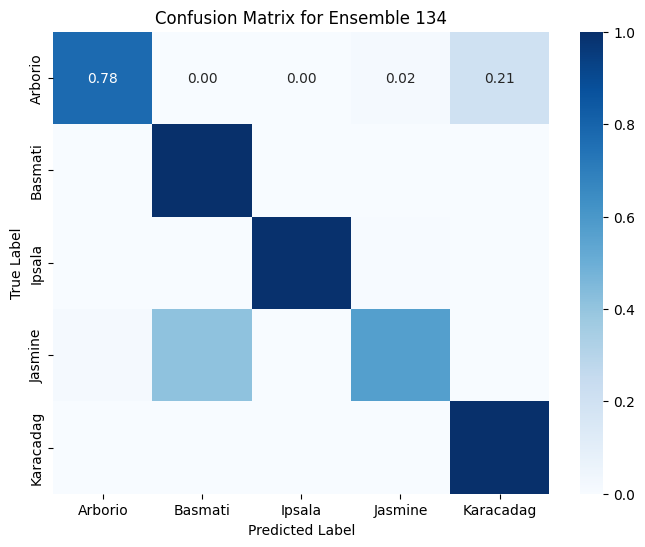

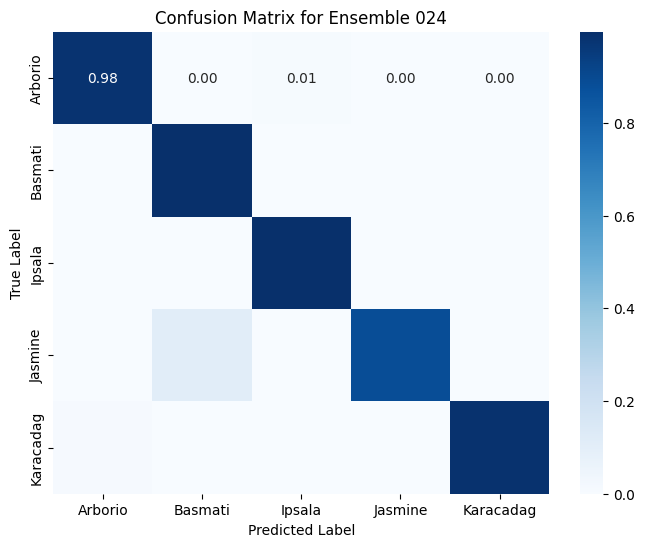

In [11]:
cm1 = confusion_matrix(test_labels, ensemble_134_predicted_classes)

        # Plot confusion matrix
plot_confusion_matrix(cm1, class_names, title=f'Confusion Matrix for Ensemble 134')

cm2 = confusion_matrix(test_labels, ensemble_024_predicted_classes)

        # Plot confusion matrix
plot_confusion_matrix(cm2, class_names, title=f'Confusion Matrix for Ensemble 024')